In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import wordcloud

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To mock web-browser and scrap tweets
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nlt

In [2]:
data=pd.read_csv(r'shashiji.csv')

In [3]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1212608755092856833,1212608755092856833,1577943431000,2020-01-02,11:07:11,India Standard Time,24705126,shashitharoor,Shashi Tharoor,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '24705126', 'username': 'ShashiTh...",NaN
1,1212396700289183744,1212396700289183744,1577892873000,2020-01-01,21:04:33,India Standard Time,24705126,shashitharoor,Shashi Tharoor,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '24705126', 'username': 'ShashiTh...",NaN
2,1212396344465412096,1212396344465412096,1577892788000,2020-01-01,21:03:08,India Standard Time,24705126,shashitharoor,Shashi Tharoor,NaN,...,https://twitter.com/tanwer_m/status/1212106509...,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '24705126', 'username': 'ShashiTh...",NaN
3,1212391934599319554,1212391934599319554,1577891737000,2020-01-01,20:45:37,India Standard Time,24705126,shashitharoor,Shashi Tharoor,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '24705126', 'username': 'ShashiTh...",NaN
4,1212361818234064896,1212361818234064896,1577884556000,2020-01-01,18:45:56,India Standard Time,24705126,shashitharoor,Shashi Tharoor,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '24705126', 'username': 'ShashiTh...",NaN


In [4]:
required_data=data[['username','tweet']] 

In [5]:
required_data

,username,tweet
0,shashitharoor,"“He alone is a man who keeps his word, Not tha..."
1,shashitharoor,"""We have now sunk to such a depth at which the..."
2,shashitharoor,There is no sight more inspiring than a group ...
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ..."
4,shashitharoor,Begin the year with an optimistic but realisti...
5,shashitharoor,Biggest hope of stopping Modi govt’s sinister ...
6,shashitharoor,With bonus points for a seven-letter word I ho...
7,shashitharoor,pic.twitter.com/xghtM6W73h
8,shashitharoor,pic.twitter.com/1Nucw4J7Cf
9,shashitharoor,[In Malayalam] my view of the major events of ...


In [6]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [7]:
sentiments_using_textblob = required_data.tweet.apply(lambda tweets: fetch_sentiment_using_textblob(tweets))
pd.DataFrame(sentiments_using_textblob.value_counts())

,tweet
pos,1167
neg,193


In [8]:
required_data['sentiment'] = sentiments_using_textblob
required_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,username,tweet,sentiment
0,shashitharoor,"“He alone is a man who keeps his word, Not tha...",pos
1,shashitharoor,"""We have now sunk to such a depth at which the...",pos
2,shashitharoor,There is no sight more inspiring than a group ...,pos
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",pos
4,shashitharoor,Begin the year with an optimistic but realisti...,pos


In [62]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [10]:
required_data['tidy_tweets'] = np.vectorize(remove_pattern)(required_data['tweet'], "@[\w]*")
required_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,username,tweet,sentiment,tidy_tweets
0,shashitharoor,"“He alone is a man who keeps his word, Not tha...",pos,"“He alone is a man who keeps his word, Not tha..."
1,shashitharoor,"""We have now sunk to such a depth at which the...",pos,"""We have now sunk to such a depth at which the..."
2,shashitharoor,There is no sight more inspiring than a group ...,pos,There is no sight more inspiring than a group ...
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",pos,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ..."
4,shashitharoor,Begin the year with an optimistic but realisti...,pos,Begin the year with an optimistic but realisti...
5,shashitharoor,Biggest hope of stopping Modi govt’s sinister ...,neg,Biggest hope of stopping Modi govt’s sinister ...
6,shashitharoor,With bonus points for a seven-letter word I ho...,pos,With bonus points for a seven-letter word I ho...
7,shashitharoor,pic.twitter.com/xghtM6W73h,pos,pic.twitter.com/xghtM6W73h
8,shashitharoor,pic.twitter.com/1Nucw4J7Cf,pos,pic.twitter.com/1Nucw4J7Cf
9,shashitharoor,[In Malayalam] my view of the major events of ...,pos,[In Malayalam] my view of the major events of ...


In [65]:
required_data['tidy_tweets'] = np.vectorize(remove_pattern)(required_data['tweet'], "pictwitter[\w]*")
required_data.head(10)

,username,tweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,shashitharoor,"“He alone is a man who keeps his word, Not tha...",pos,"“He alone is a man who keeps his word, Not tha...",He alone is a man who keeps his word Not that ...
1,shashitharoor,"""We have now sunk to such a depth at which the...",pos,"""We have now sunk to such a depth at which the...",We have now sunk to such a depth at which the ...
2,shashitharoor,There is no sight more inspiring than a group ...,pos,There is no sight more inspiring than a group ...,There is no sight more inspiring than a group ...
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",pos,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",#HappyNewYear pi...
4,shashitharoor,Begin the year with an optimistic but realisti...,pos,Begin the year with an optimistic but realisti...,Begin the year with an optimistic but realisti...
5,shashitharoor,Biggest hope of stopping Modi govt’s sinister ...,neg,Biggest hope of stopping Modi govt’s sinister ...,Biggest hope of stopping Modi govts sinister N...
6,shashitharoor,With bonus points for a seven-letter word I ho...,pos,With bonus points for a seven-letter word I ho...,With bonus points for a sevenletter word I hope
7,shashitharoor,pic.twitter.com/xghtM6W73h,pos,pic.twitter.com/xghtM6W73h,pictwittercomxghtMWh
8,shashitharoor,pic.twitter.com/1Nucw4J7Cf,pos,pic.twitter.com/1Nucw4J7Cf,pictwittercomNucwJCf
9,shashitharoor,[In Malayalam] my view of the major events of ...,pos,[In Malayalam] my view of the major events of ...,In Malayalam my view of the major events of th...


In [64]:
cleaned_tweets = []

for index, row in required_data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

required_data['tidy_tweets'] = cleaned_tweets
required_data.head(10)

,username,tweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,shashitharoor,"“He alone is a man who keeps his word, Not tha...",pos,"“He alone is a man who keeps his word, Not tha...",He alone is a man who keeps his word Not that ...
1,shashitharoor,"""We have now sunk to such a depth at which the...",pos,"""We have now sunk to such a depth at which the...",We have now sunk to such a depth at which the ...
2,shashitharoor,There is no sight more inspiring than a group ...,pos,There is no sight more inspiring than a group ...,There is no sight more inspiring than a group ...
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",pos,"""कब आया-गया साल पता किसको चला है इनके लिए एक औ...",#HappyNewYear pi...
4,shashitharoor,Begin the year with an optimistic but realisti...,pos,Begin the year with an optimistic but realisti...,Begin the year with an optimistic but realisti...
5,shashitharoor,Biggest hope of stopping Modi govt’s sinister ...,neg,Biggest hope of stopping Modi govt’s sinister ...,Biggest hope of stopping Modi govts sinister N...
6,shashitharoor,With bonus points for a seven-letter word I ho...,pos,With bonus points for a seven-letter word I ho...,With bonus points for a sevenletter word I hope
7,shashitharoor,pic.twitter.com/xghtM6W73h,pos,pic.twitter.com/xghtM6W73h,pictwittercomxghtMWh
8,shashitharoor,pic.twitter.com/1Nucw4J7Cf,pos,pic.twitter.com/1Nucw4J7Cf,pictwittercomNucwJCf
9,shashitharoor,[In Malayalam] my view of the major events of ...,pos,[In Malayalam] my view of the major events of ...,In Malayalam my view of the major events of th...


In [12]:
required_data = required_data[required_data['tidy_tweets']!='']
required_data.head()

,username,tweet,sentiment,tidy_tweets
0,shashitharoor,"“He alone is a man who keeps his word, Not tha...",pos,"“He alone is a man who keeps his word, Not tha..."
1,shashitharoor,"""We have now sunk to such a depth at which the...",pos,"""We have now sunk to such a depth at which the..."
2,shashitharoor,There is no sight more inspiring than a group ...,pos,There is no sight more inspiring than a group ...
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",pos,"""कब आया-गया साल पता किसको चला है इनके लिए एक औ..."
4,shashitharoor,Begin the year with an optimistic but realisti...,pos,Begin the year with an optimistic but realisti...


In [61]:
#Removing Punctuations, Numbers and Special characters
required_data['absolute_tidy_tweets'] = required_data['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")
required_data.head()

,username,tweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,shashitharoor,"“He alone is a man who keeps his word, Not tha...",pos,"“He alone is a man who keeps his word, Not tha...",He alone is a man who keeps his word Not that ...
1,shashitharoor,"""We have now sunk to such a depth at which the...",pos,"""We have now sunk to such a depth at which the...",We have now sunk to such a depth at which the ...
2,shashitharoor,There is no sight more inspiring than a group ...,pos,There is no sight more inspiring than a group ...,There is no sight more inspiring than a group ...
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",pos,"""कब आया-गया साल पता किसको चला है इनके लिए एक औ...",#HappyNewYear pi...
4,shashitharoor,Begin the year with an optimistic but realisti...,pos,Begin the year with an optimistic but realisti...,Begin the year with an optimistic but realisti...


In [60]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in required_data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
required_data['absolute_tidy_tweets'] = cleaned_tweets
required_data.head(10)

,username,tweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,shashitharoor,"“He alone is a man who keeps his word, Not tha...",pos,"“He alone is a man who keeps his word, Not tha...",He alone man keeps word Not one thing heart an...
1,shashitharoor,"""We have now sunk to such a depth at which the...",pos,"""We have now sunk to such a depth at which the...",We sunk depth restatement obvious first duty c...
2,shashitharoor,There is no sight more inspiring than a group ...,pos,There is no sight more inspiring than a group ...,There sight inspiring group determined young i...
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",pos,"""कब आया-गया साल पता किसको चला है इनके लिए एक औ...",- pictwittercomjoKSNszMsb
4,shashitharoor,Begin the year with an optimistic but realisti...,pos,Begin the year with an optimistic but realisti...,Begin year optimistic realistic read pictwitte...
5,shashitharoor,Biggest hope of stopping Modi govt’s sinister ...,neg,Biggest hope of stopping Modi govt’s sinister ...,Biggest hope stopping Modi govts sinister NRC ...
6,shashitharoor,With bonus points for a seven-letter word I ho...,pos,With bonus points for a seven-letter word I ho...,With bonus points seven-letter word I hope
7,shashitharoor,pic.twitter.com/xghtM6W73h,pos,pic.twitter.com/xghtM6W73h,pictwittercomxghtMWh
8,shashitharoor,pic.twitter.com/1Nucw4J7Cf,pos,pic.twitter.com/1Nucw4J7Cf,pictwittercomNucwJCf
9,shashitharoor,[In Malayalam] my view of the major events of ...,pos,[In Malayalam] my view of the major events of ...,In Malayalam view major events year


In [76]:
stopwords = nltk.corpus.stopwords.words('english')
new_words=('re','name', 'user', 'ct','The','This','My','pictwittercom','I','A','W')
for i in new_words:
    stopwords.append(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [81]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

In [82]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [83]:
key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in required_data.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['man',
  'word',
  'thing',
  'heart',
  'tongue',
  'urugobindsingh pic',
  'twitter',
  'com h8d4n9y1il'],
 ['depth', 'restatement', 'first duty', 'civilised men', '-- g eorge orwell'],
 ['sight',
  'group',
  'determined young idealist',
  'may',
  'happy new year',
  'twitter',
  'com tanwer_m status'],
 ['इनक',
  'बदल बदल वरन बदल ेगा" happynewyear pic',
  'twitter',
  'com /jok snszmsb'],
 ['year', 'realistic read', 'amzn', 'pic', 'twitter', 'com /p7t dew57zu'],
 ['biggest hope',
  'modi govt sinister  nrc project',
  'rest',
  'india youth',
  'take',
  'start',
  'year',
  'theprint',
  'opinion'],
 ['bonus point', 'seven-letter word', 'twitter', 'merugokhale status'],
 ['pic', 'twitter', 'com xghtm6w73h'],
 ['pic', 'twitter', 'com'],
 ['malayalam',
  'view',
  'major event',
  'year',
  'news18kerala',
  'www',
  'facebook',
  'com news18kerala']]

In [84]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in required_data.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[[],
 ['first duty', 'george orwell'],
 ['may',
  'happy new year',
  'https://twitter.com/tanwer_m/status/1212106509363990528 …'],
 ['कब आया-गया साल पता किसको चला है इनके लिए एक और दिन',
  'भूखे ही ढ़ला है बदलेगा मेरा देश जब ये हाल बदलेगा वरना सिर्फ कैलेंडर में ही साल बदलेगा'],
 ['https://amzn.to/35uf7z6 pic.twitter.com/p7tdew57zu'],
 ['modi govt ’',
  'sinister nrc project',
  'india ’',
  'year https://theprint.in/opinion/biggest-hope-of-stopping-modi-govts-sinister-nrc-project-in-2020-rests-on-indias-youth/340839/ …'],
 ['seven-letter word',
  'https://twitter.com/merugokhale/status/1212355987606106118 …'],
 [],
 [],
 ['malayalam',
  'news18kerala',
  'https://www.facebook.com/news18kerala/videos/2574178772617484/ …']]

In [85]:
required_data['key_phrases'] = textblob_key_phrases
required_data.head(10)


,username,tweet,sentiment,tidy_tweets,absolute_tidy_tweets,key_phrases
0,shashitharoor,"“He alone is a man who keeps his word, Not tha...",pos,"“He alone is a man who keeps his word, Not tha...",He alone is a man who keeps his word Not that ...,[]
1,shashitharoor,"""We have now sunk to such a depth at which the...",pos,"""We have now sunk to such a depth at which the...",We have now sunk to such a depth at which the ...,"[first duty, george orwell]"
2,shashitharoor,There is no sight more inspiring than a group ...,pos,There is no sight more inspiring than a group ...,There is no sight more inspiring than a group ...,"[may, happy new year, https://twitter.com/tanw..."
3,shashitharoor,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",pos,"""कब आया-गया साल पता किसको चला है\nइनके लिए एक ...",#HappyNewYear pi...,[कब आया-गया साल पता किसको चला है इनके लिए एक औ...
4,shashitharoor,Begin the year with an optimistic but realisti...,pos,Begin the year with an optimistic but realisti...,Begin the year with an optimistic but realisti...,[https://amzn.to/35uf7z6 pic.twitter.com/p7tde...
5,shashitharoor,Biggest hope of stopping Modi govt’s sinister ...,neg,Biggest hope of stopping Modi govt’s sinister ...,Biggest hope of stopping Modi govts sinister N...,"[modi govt ’, sinister nrc project, india ’, y..."
6,shashitharoor,With bonus points for a seven-letter word I ho...,pos,With bonus points for a seven-letter word I ho...,With bonus points for a sevenletter word I hope,"[seven-letter word, https://twitter.com/merugo..."
7,shashitharoor,pic.twitter.com/xghtM6W73h,pos,pic.twitter.com/xghtM6W73h,pictwittercomxghtMWh,[]
8,shashitharoor,pic.twitter.com/1Nucw4J7Cf,pos,pic.twitter.com/1Nucw4J7Cf,pictwittercomNucwJCf,[]
9,shashitharoor,[In Malayalam] my view of the major events of ...,pos,[In Malayalam] my view of the major events of ...,In Malayalam my view of the major events of th...,"[malayalam, news18kerala, https://www.facebook..."


In [89]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('on')
    plt.show()

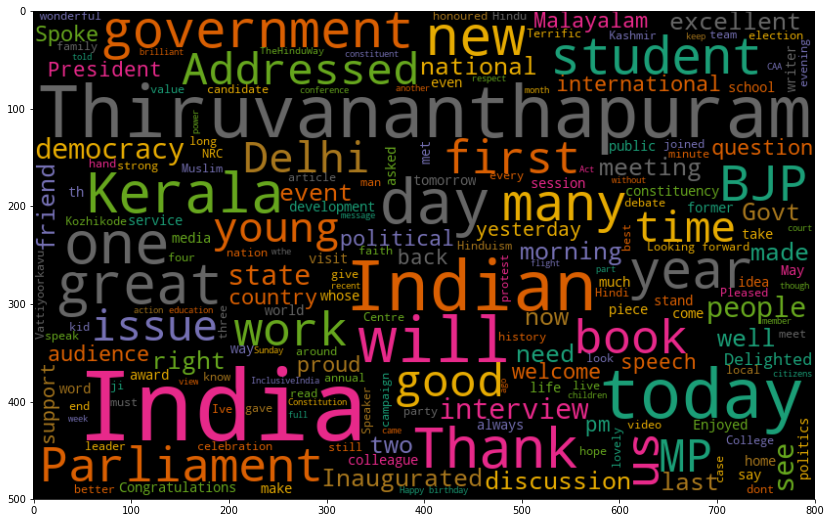

In [90]:
all_words = ' '.join([text for text in required_data['absolute_tidy_tweets'][required_data.sentiment == 'pos']])
generate_wordcloud(all_words)

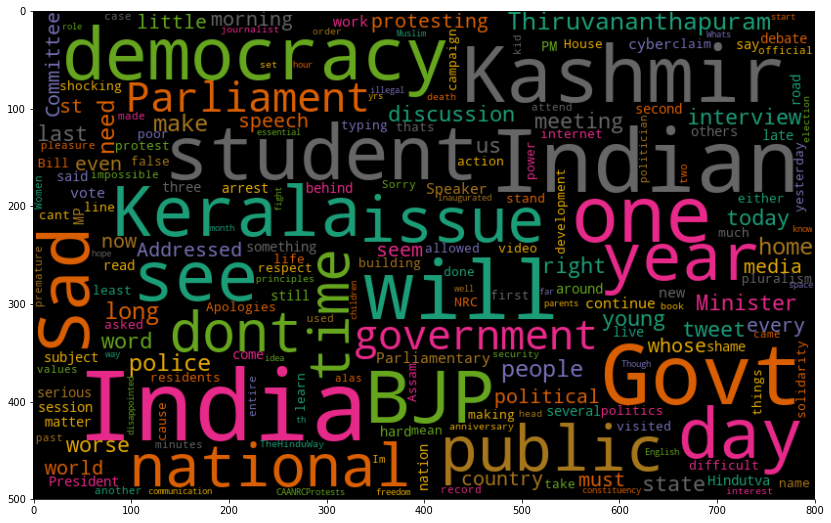

In [91]:
all_words = ' '.join([text for text in required_data['absolute_tidy_tweets'][required_data.sentiment == 'neg']])
generate_wordcloud(all_words)

In [92]:
import collections
filtered_words = [word for word in all_words.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

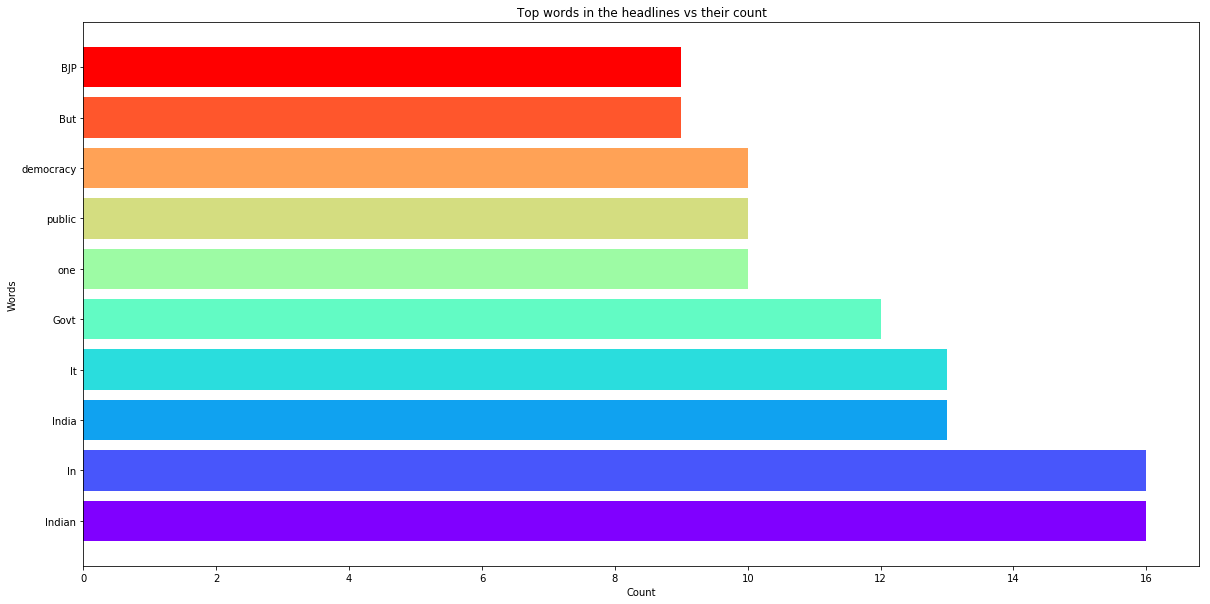

In [93]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [94]:
filtered_words = [word for word in all_words.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common()[:-10-1:-1]:
    words.append(letter)
    counts.append(count)


<BarContainer object of 10 artists>

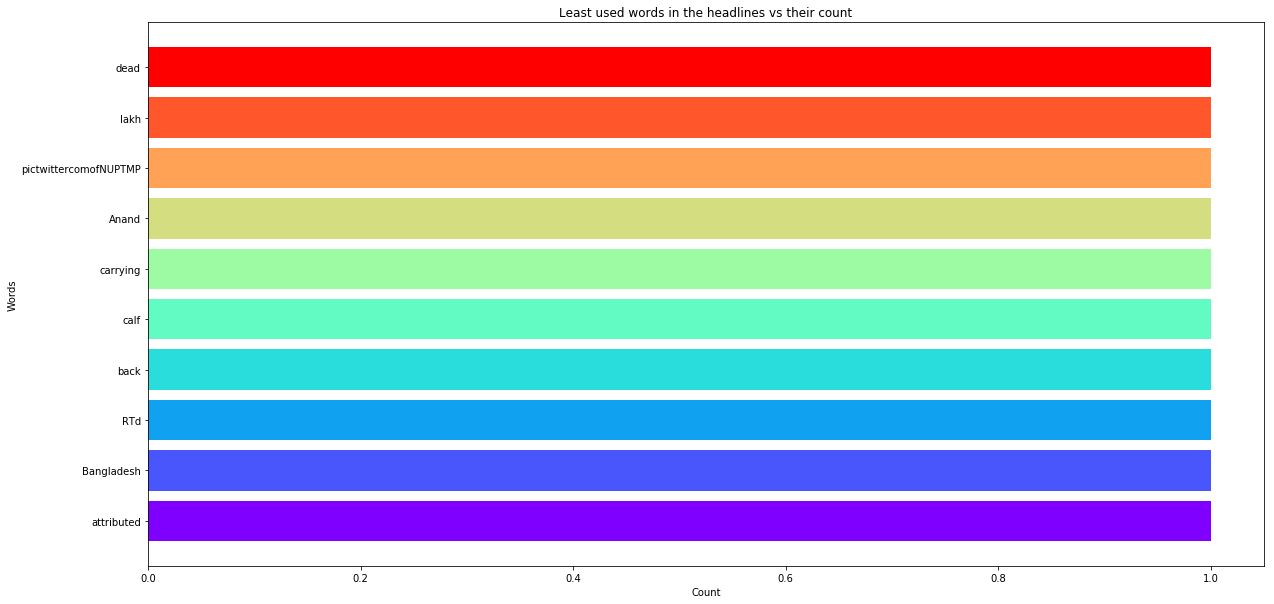

In [95]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Least used words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [68]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '